This notebook
1. reads in y_true/y_pred and other relevant results from results tables
2. makes confusion matrices
3. makes classification reuslts tables for all assets and periods

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import time

### Overall

In [2]:
cnn_versions = ["indiv", "univ"]
Names = ['GSPC', 'N225','IXIC', 'AAPL', 'SPY']

# Test 1 (2006-2007)

### Main Classification Results

In [3]:
Results1 = pd.DataFrame(columns = ["Assets", 
                                   "Accuracy_i", "Accuracy_u", 
                                   "MacroF1_i", "MacroF1_u",
                                   "MacroPrec_i", "MacroPrec_u",
                                   "MacroRec_i", "MacroRec_u",
                                   "Train_Pred_Time_i", "Train_Pred_Time_u"
                                  ])
Results1['Assets'] = Names

In [4]:
cnns_path1 = "../results tables/Results/test1"
cnns_result1 = []

In [5]:
# check for data on relevant model variant
for variant in cnn_versions:
    cnns_path1_ = cnns_path1 + "/" + variant
    abbrev = variant[0]
    for VarName in os.listdir(cnns_path1_):
        
        #get data - first round: making dataframes for each asset
        vars()[abbrev + "_" + VarName + "_TruePreds"] = pd.read_csv(cnns_path1_ + "/" + VarName + "/" + "True_Pred.csv")
        
        #check
        print(eval(abbrev + "_" + VarName + "_TruePreds").head())

        # get financial results for each asset, each model variant

        cnns_result1.append(np.load(cnns_path1_ + "/" + VarName + "/" + "Time_ClassificationEval.npz"))
 
        # Save to table
        Results1['Accuracy_' + abbrev].loc[Results1['Assets'] == VarName] = np.float(cnns_result1[-1]['accuracy'])
        Results1['MacroF1_' + abbrev].loc[Results1['Assets'] == VarName] = np.float(cnns_result1[-1]['MacF1'])
        Results1['MacroPrec_' + abbrev].loc[Results1['Assets'] == VarName] = np.float(cnns_result1[-1]['MacPrecision'])
        Results1['MacroRec_' + abbrev].loc[Results1['Assets'] == VarName] = np.float(cnns_result1[-1]['MacRecall'])
        Results1['Train_Pred_Time_' + abbrev].loc[Results1['Assets'] == VarName] = str(cnns_result1[-1]['TrainTime']) + "/" + str(cnns_result1[-1]['PredTime'])


   Unnamed: 0  AAPL  Prediction
0           0     2           2
1           1     2           2
2           2     2           2
3           3     1           2
4           4     2           2
   Unnamed: 0  GSPC  Prediction
0           0     1           0
1           1     2           0
2           2     2           2
3           3     2           2
4           4     2           2
   Unnamed: 0  IXIC  Prediction
0           0     1           2
1           1     2           1
2           2     2           1
3           3     2           2
4           4     2           1
   Unnamed: 0  N225  Prediction
0           0     2           2
1           1     1           0
2           2     2           1
3           3     2           2
4           4     2           0
   Unnamed: 0  SPY  Prediction
0           0    1           0
1           1    2           1
2           2    2           2
3           3    2           1
4           4    2           2
   Unnamed: 0  AAPL  Prediction
0           0 

In [6]:
Results1

,Assets,Accuracy_i,Accuracy_u,MacroF1_i,MacroF1_u,MacroPrec_i,MacroPrec_u,MacroRec_i,MacroRec_u,Train_Pred_Time_i,Train_Pred_Time_u
0,GSPC,0.514451,0.447013,0.356097,0.447292,0.360561,0.431316,0.351743,0.464497,510.33604288101196/0.40802931785583496,2528.513612270355/0.39552927017211914
1,N225,0.558767,0.489403,0.384772,0.506201,0.385447,0.473856,0.384099,0.543286,431.6817560195923/0.5916943550109863,2528.513612270355/0.08987998962402344
2,IXIC,0.545279,0.429672,0.348163,0.43139,0.345496,0.417125,0.350872,0.446667,299.33683586120605/0.4084622859954834,2528.513612270355/0.08674120903015137
3,AAPL,0.585742,0.431599,0.362344,0.406797,0.369014,0.403472,0.355911,0.410178,656.0885660648346/0.6009604930877686,2528.513612270355/0.07485461235046387
4,SPY,0.570328,0.441233,0.378574,0.466509,0.375115,0.441118,0.382099,0.495003,233.18556332588196/0.6344456672668457,2528.513612270355/0.08799147605895996


In [7]:
Results1.to_csv('../results tables/test1_main_classification&time_results.csv')

# Test 2 (2009-2010)

### Main Classification Results

In [8]:
Results2 = pd.DataFrame(columns = ["Assets", 
                                   "Accuracy_i", "Accuracy_u", 
                                   "MacroF1_i", "MacroF1_u",
                                   "MacroPrec_i", "MacroPrec_u",
                                   "MacroRec_i", "MacroRec_u",
                                   "Train_Pred_Time_i", "Train_Pred_Time_u"
                                  ])
Results2['Assets'] = Names

In [9]:
cnns_path2 = "../results tables/Results/test2"
cnns_result2 = []

In [10]:
# check for data on relevant model variant
for variant in cnn_versions:
    cnns_path2_ = cnns_path2 + "/" + variant
    abbrev = variant[0]
    for VarName in os.listdir(cnns_path2_):
        
        #get data - first round: making dataframes for each asset
        vars()[abbrev + "_" + VarName + "_TruePreds"] = eval(abbrev + "_" + VarName + "_TruePreds").append(pd.read_csv(cnns_path2_ + "/" + VarName + "/" + "True_Pred.csv"), ignore_index = True)
        
        #check
        print(eval(abbrev + "_" + VarName + "_TruePreds").head())

        # get financial results for each asset, each model variant

        cnns_result2.append(np.load(cnns_path2_ + "/" + VarName + "/" + "Time_ClassificationEval.npz"))
 
        # Save to table
        Results2['Accuracy_' + abbrev].loc[Results2['Assets'] == VarName] = np.float(cnns_result2[-1]['accuracy'])
        Results2['MacroF1_' + abbrev].loc[Results2['Assets'] == VarName] = np.float(cnns_result2[-1]['MacF1'])
        Results2['MacroPrec_' + abbrev].loc[Results2['Assets'] == VarName] = np.float(cnns_result2[-1]['MacPrecision'])
        Results2['MacroRec_' + abbrev].loc[Results2['Assets'] == VarName] = np.float(cnns_result2[-1]['MacRecall'])
        Results2['Train_Pred_Time_' + abbrev].loc[Results2['Assets'] == VarName] = str(cnns_result2[-1]['TrainTime']) + "/" + str(cnns_result2[-1]['PredTime'])


   Unnamed: 0  AAPL  Prediction
0           0     2           2
1           1     2           2
2           2     2           2
3           3     1           2
4           4     2           2
   Unnamed: 0  GSPC  Prediction
0           0     1           0
1           1     2           0
2           2     2           2
3           3     2           2
4           4     2           2
   Unnamed: 0  IXIC  Prediction
0           0     1           2
1           1     2           1
2           2     2           1
3           3     2           2
4           4     2           1
   Unnamed: 0  N225  Prediction
0           0     2           2
1           1     1           0
2           2     2           1
3           3     2           2
4           4     2           0
   Unnamed: 0  SPY  Prediction
0           0    1           0
1           1    2           1
2           2    2           2
3           3    2           1
4           4    2           2
   Unnamed: 0  AAPL  Prediction
0           0 

In [11]:
Results2

,Assets,Accuracy_i,Accuracy_u,MacroF1_i,MacroF1_u,MacroPrec_i,MacroPrec_u,MacroRec_i,MacroRec_u,Train_Pred_Time_i,Train_Pred_Time_u
0,GSPC,0.594231,0.438462,0.40132,0.414407,0.403386,0.392302,0.399274,0.439152,610.9065203666687/0.30267953872680664,5715.254278898239/0.39171361923217773
1,N225,0.526923,0.401923,0.332016,0.361562,0.330515,0.357025,0.33353,0.366215,352.09475684165955/0.30168843269348145,5715.254278898239/0.09148621559143066
2,IXIC,0.567308,0.451923,0.376483,0.444811,0.376491,0.415883,0.376474,0.478065,246.5866620540619/0.29550933837890625,5715.254278898239/0.09745407104492188
3,AAPL,0.584615,0.430769,0.373612,0.415337,0.374142,0.393362,0.373083,0.439913,395.2826852798462/0.6831746101379395,5715.254278898239/0.0935661792755127
4,SPY,0.582692,0.440385,0.381207,0.429602,0.382206,0.408684,0.380214,0.452776,296.0740592479706/0.6059215068817139,5715.254278898239/0.10056686401367188


In [12]:
Results2.to_csv('../results tables/test2_main_classification&time_results.csv')

# Test 3 (2017-2018/19)

### Main Classification Results

In [13]:
Results3 = pd.DataFrame(columns = ["Assets", 
                                   "Accuracy_i", "Accuracy_u", 
                                   "MacroF1_i", "MacroF1_u",
                                   "MacroPrec_i", "MacroPrec_u",
                                   "MacroRec_i", "MacroRec_u",
                                   "Train_Pred_Time_i", "Train_Pred_Time_u"
                                  ])
Results3['Assets'] = Names

In [14]:
cnns_path3 = "../results tables/Results/test3"
cnns_result3 = []

In [15]:
# check for data on relevant model variant
for variant in cnn_versions:
    cnns_path3_ = cnns_path3 + "/" + variant
    abbrev = variant[0]
    for VarName in os.listdir(cnns_path3_):
        
        #get data - first round: making dataframes for each asset
        vars()[abbrev + "_" + VarName + "_TruePreds"] = eval(abbrev + "_" + VarName + "_TruePreds").append(pd.read_csv(cnns_path3_ + "/" + VarName + "/" + "True_Pred.csv"), ignore_index = True)
        
        #check
        #print(eval(abbrev + "_" + VarName + "_TruePreds").head())

        # get financial results for each asset, each model variant

        cnns_result3.append(np.load(cnns_path3_ + "/" + VarName + "/" + "Time_ClassificationEval.npz"))
 
        # Save to table
        Results3['Accuracy_' + abbrev].loc[Results3['Assets'] == VarName] = np.float(cnns_result3[-1]['accuracy'])
        Results3['MacroF1_' + abbrev].loc[Results3['Assets'] == VarName] = np.float(cnns_result3[-1]['MacF1'])
        Results3['MacroPrec_' + abbrev].loc[Results3['Assets'] == VarName] = np.float(cnns_result3[-1]['MacPrecision'])
        Results3['MacroRec_' + abbrev].loc[Results3['Assets'] == VarName] = np.float(cnns_result3[-1]['MacRecall'])
        Results3['Train_Pred_Time_' + abbrev].loc[Results3['Assets'] == VarName] = str(cnns_result3[-1]['TrainTime']) + "/" + str(cnns_result3[-1]['PredTime'])


In [16]:
Results3

,Assets,Accuracy_i,Accuracy_u,MacroF1_i,MacroF1_u,MacroPrec_i,MacroPrec_u,MacroRec_i,MacroRec_u,Train_Pred_Time_i,Train_Pred_Time_u
0,GSPC,0.590476,0.441905,0.381078,0.519148,0.387116,0.478142,0.375225,0.567846,932.7675879001617/0.3314955234527588,1860.0218834877014/0.31247687339782715
1,N225,0.579048,0.379048,0.404712,0.448197,0.400231,0.43472,0.409293,0.462535,514.2808556556702/0.3007657527923584,1860.0218834877014/0.06088113784790039
2,IXIC,0.502857,0.411429,0.361486,0.466704,0.3568,0.435613,0.366296,0.502575,400.6426725387573/0.29297709465026855,1860.0218834877014/0.07774519920349121
3,AAPL,0.554286,0.367619,0.348209,0.461336,0.347164,0.433831,0.34926,0.492565,352.04435563087463/0.30869102478027344,1860.0218834877014/0.06592583656311035
4,SPY,0.55619,0.419048,0.365622,0.489343,0.358856,0.451367,0.372647,0.534295,334.7271132469177/0.3200547695159912,1860.0218834877014/0.05972599983215332


In [17]:
Results3.to_csv('../results tables/test3_main_classification&time_results.csv')

# All: Confusion matrices

## 10 asset-wise

In [18]:
label_names_array = ['Sell', 'Buy', 'Hold']
y_true_univ = np.array([])
y_true_indiv = np.array([])

y_pred_univ = np.array([])
y_pred_indiv = np.array([])

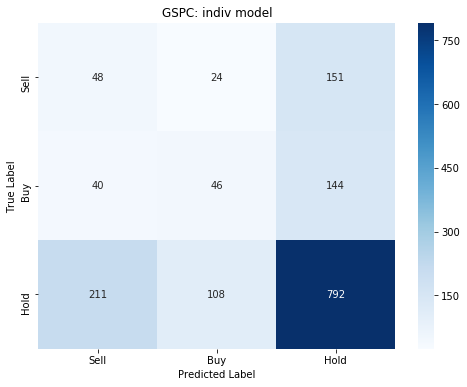

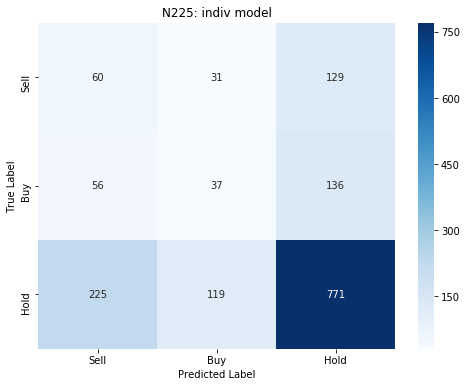

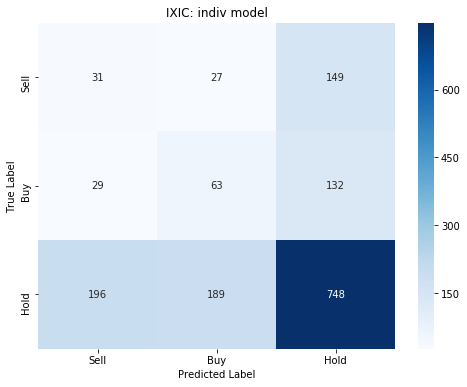

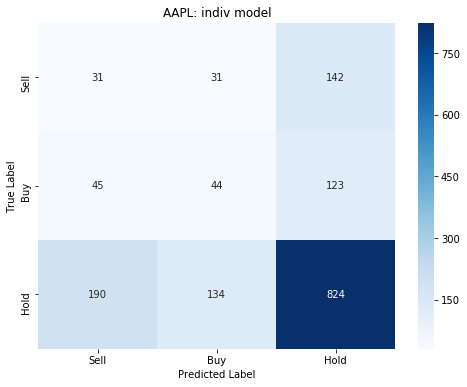

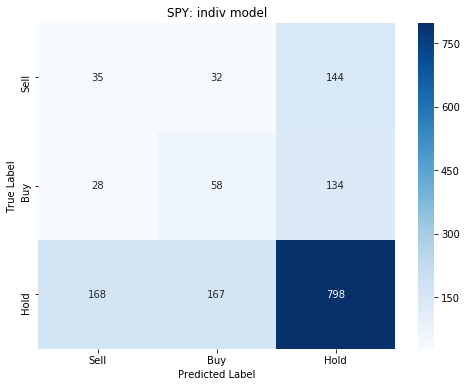

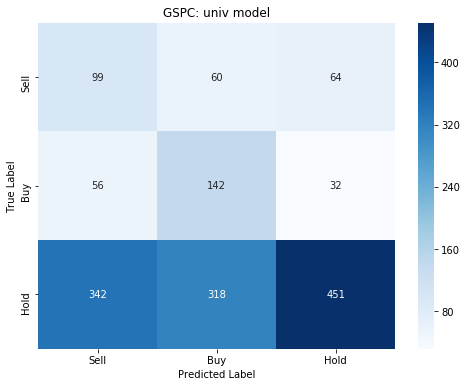

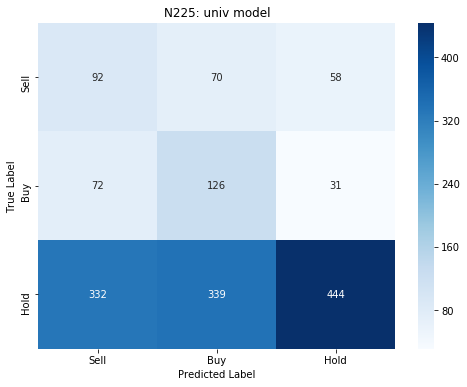

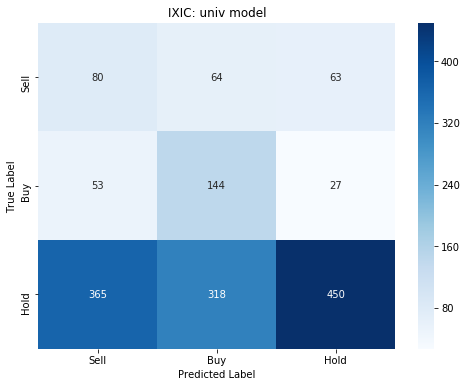

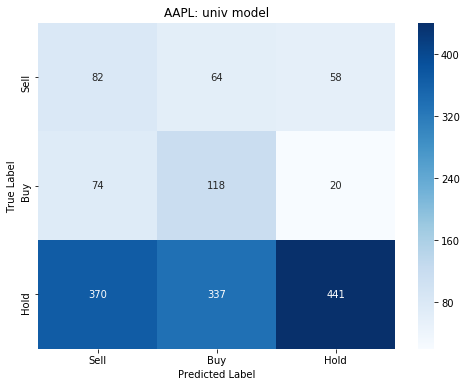

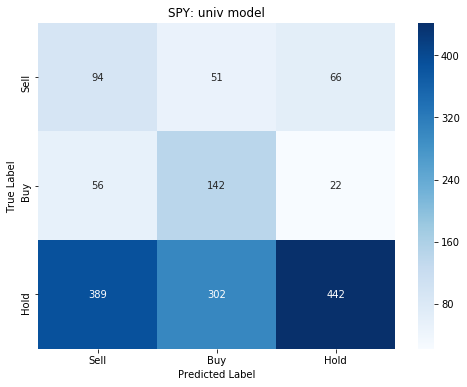

In [19]:
for variant in cnn_versions:
    abbrev = variant[0]
    for VarName in Names:
        # get data
        y_true = eval(abbrev + "_" + VarName + "_TruePreds")[VarName]
        y_pred = eval(abbrev + "_" + VarName + "_TruePreds")['Prediction']
        
        # for aggregated
        vars()["y_true_" + variant] = np.append(eval("y_true_" + variant), y_true)
        vars()["y_pred_" + variant] = np.append(eval("y_pred_" + variant), y_pred)
        
        # plot
        cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), 
                                 index = label_names_array, 
                                 columns = label_names_array)

        plt.figure(figsize=[8,6])
        sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
        plt.title(VarName + ": "+ variant + " model")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.savefig("../report/0304(0)_report/images/CMs/CM_" + variant + "_" + VarName +'.png')

## 2 Overall

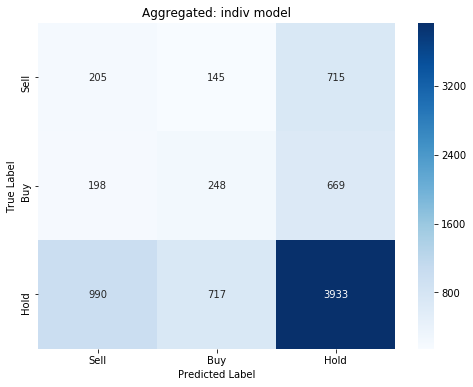

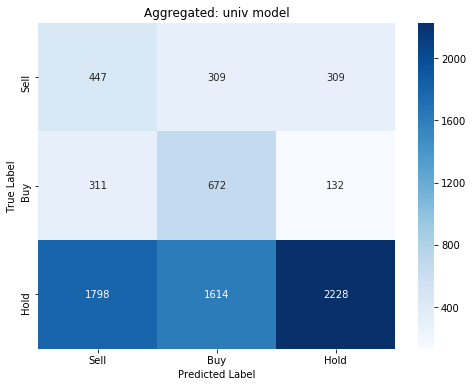

In [20]:
for variant in cnn_versions:
    # plot
    cm =  pd.DataFrame(confusion_matrix(eval("y_true_" + variant), eval("y_pred_" + variant)), 
                             index = label_names_array, 
                             columns = label_names_array)

    plt.figure(figsize=[8,6])
    sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
    plt.title("Aggregated: " + variant + " model")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig("../report/0304(0)_report/images/CMs/CM_" + variant + "_aggreg.png")